This notebook contains code that demonstrates linear regression. Uncomment lines to learn more.

In [1]:
# Import tensorflow and other libraries.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

import numpy as np
import math

%matplotlib inline
import pylab

In [2]:
sess = None
def resetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

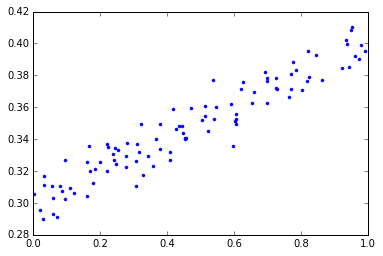

In [3]:
resetSession()

# Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_train, y_train, '.')

In [4]:
# Create some fake evaluation data
x_eval = np.random.rand(len(x_train)).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_eval = x_eval * 0.1 + 0.3 + noise

In [5]:
# Build inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_normal([1]), name='weights')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Uncomment the following lines to see what W and b are.
print(W)
print(b)

# Create a placeholder we'll use later to feed x's into the graph for training and eval.
# shape=[None] means we can put in any number of examples. 
# This is used for minibatch training, and to evaluate a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

# Uncomment this line to see what x is
print(x)

# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
y = W * x + b

Tensor("weights/read:0", shape=(1,), dtype=float32)
Tensor("bias/read:0", shape=(1,), dtype=float32)
Tensor("x:0", shape=(?,), dtype=float32)


At this point, we have:
* x_train: x input features
* y_train: observed y for each x that we will train on
* x_eval, y_eval: Same as above, but a smaller set that we will not train on, and instead evaluate our effectiveness. 

In [6]:
# Write the graph so we can look at it in TensorBoard
# https://www.tensorflow.org/versions/r0.12/how_tos/summaries_and_tensorboard/index.html
sw = tf.summary.FileWriter('summaries/', graph=tf.get_default_graph())

In [7]:
# Create a placeholder we'll use later to feed the correct y value into the graph
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
print (y_label)

Tensor("y_label:0", shape=(?,), dtype=float32)


In [8]:
# Build training graph.
loss = tf.reduce_mean(tf.square(y - y_label))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)

loss: Tensor("Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fee605bcbd0>
train: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weights/ApplyGradientDescent"
input: "^GradientDescent/update_bias/ApplyGradientDescent"



In [10]:
# Create an operation to initialize all the variables.
init = tf.global_variables_initializer()
print(init)
sess.run(init)

name: "init_1"
op: "NoOp"
input: "^weights/Assign"
input: "^bias/Assign"



In [11]:
# Uncomment the following line to see the initial W and b values.
print(sess.run([W, b]))

[array([-0.72213203], dtype=float32), array([ 0.26504382], dtype=float32)]


In [12]:
# Uncomment these lines to test that we can compute a y from an x (without having trained anything). 
# x must be a vector, hence [3] not just 3.
x_in = [3]
sess.run(y, feed_dict={x: x_in})

array([-1.90135229], dtype=float32)

In [16]:
# Calculate loss on the evaluation data before training
def eval_loss():
    return sess.run(loss, feed_dict={x: x_eval, y_label: y_eval})
eval_loss()

0.34753081

In [14]:
# Track of how loss changes, so we can visualize it in TensorBoard
tf.summary.scalar('loss', loss)
summary_op = tf.summary.merge_all()

In [15]:
# Perform training.
for step in range(201):
    # Run the training op; feed the training data into the graph
    summary_str, _ = sess.run([summary_op, train], feed_dict={x: x_train, y_label: y_train})
    sw.add_summary(summary_str, step)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([W, b]))

0 [array([-0.4602713], dtype=float32), array([ 0.68401062], dtype=float32)]
20 [array([-0.05434158], dtype=float32), array([ 0.37790191], dtype=float32)]
40 [array([ 0.06040366], dtype=float32), array([ 0.32067001], dtype=float32)]
60 [array([ 0.08983741], dtype=float32), array([ 0.30598921], dtype=float32)]
80 [array([ 0.09738759], dtype=float32), array([ 0.30222338], dtype=float32)]
100 [array([ 0.0993243], dtype=float32), array([ 0.3012574], dtype=float32)]
120 [array([ 0.09982112], dtype=float32), array([ 0.3010096], dtype=float32)]
140 [array([ 0.09994856], dtype=float32), array([ 0.30094603], dtype=float32)]
160 [array([ 0.09998122], dtype=float32), array([ 0.30092975], dtype=float32)]
180 [array([ 0.09998962], dtype=float32), array([ 0.30092555], dtype=float32)]
200 [array([ 0.09999177], dtype=float32), array([ 0.30092448], dtype=float32)]


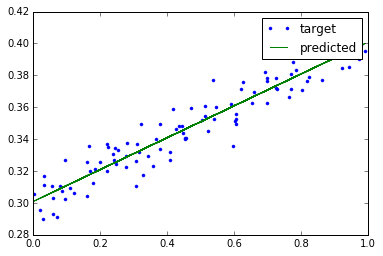

In [ ]:
# Uncomment the following lines to plot the predicted values
pylab.plot(x_train, y_train, '.', label="target")
pylab.plot(x_train, sess.run(y, feed_dict={x: x_train, y_label: y_train}), label="predicted")
pylab.legend()

In [25]:
# Check accuracy on eval data after training
eval_loss()

0.00011948729

Demonstrate saving and restoring a model

In [26]:
def predict(x_in): return sess.run(y, feed_dict={x: [x_in]})

In [34]:
# Save the model
saver = tf.train.Saver()
saver.save(sess, 'my_checkpoint.ckpt')

'my_checkpoint.ckpt'

In [28]:
# Current prediction
predict(3)

array([ 0.5920732], dtype=float32)

In [29]:
# Reset the model by running the init op again
sess.run(init) 

In [30]:
# Prediction after variables reinitialized
predict(3)

array([-3.58004212], dtype=float32)

In [40]:
saver.restore(sess, './my_checkpoint.ckpt')

In [41]:
# Predictions after variables restored
predict(3)

array([-3.58004212], dtype=float32)